In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
import math
import scipy.stats

plt.rc('legend', fontsize=18)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

font = {'family' : 'serif',
        'weight' : 'normal'}

plt.rc('font', **font)

In [2]:
#Cargamos los archivos desde el panel izquierdo y después corremos este código
resistencias=[564 ,564	,68	,562	,560	,563	,568	,563	,563	,563	,565	,562	,565	,68	,565	,68	] #Chequear el valor de las resistencias de S2, S13 y S15
err_R=[2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1]
sensdata = [0,1,3,4,5,6,7,8,9,10,11,14,2,12,13,15] 
sensdatabis= [0,1,3,4,5,6,7,8,9,10,11,14]
sensdata2 = [2,12,13,15]
data=[]
databis = []
dataAux = []
dataAuxbis = []

#Tiempo V_Vernier V_Sensor-Cuadrado

for i in sensdata:
  data.append(np.loadtxt('cal_s{}'.format(i)))
for i in sensdatabis:
  databis.append(np.loadtxt('S{}_bis'.format(i)))

"""
sensdataAux = [1,2,3]
for j in sensdataAux:
  dataAux.append(np.loadtxt('cuadrado_aux{}'.format(j)))

sensdataAuxbis = [2,3]
for k in sensdataAuxbis:
  dataAuxbis.append(np.loadtxt('cuadrado_aux{}bis'.format(k)))
  """

"\nsensdataAux = [1,2,3]\nfor j in sensdataAux:\n  dataAux.append(np.loadtxt('cuadrado_aux{}'.format(j)))\n\nsensdataAuxbis = [2,3]\nfor k in sensdataAuxbis:\n  dataAuxbis.append(np.loadtxt('cuadrado_aux{}bis'.format(k)))\n  "

In [0]:
len(data)

16

In [0]:
#Fuerza en función de la lectura
orde, errorde = -67.40046261, 1.60681
pend, errpend = 26.78885525, 0.63589

ordebis, errordebis = -64.88787502, 1.60681
pendbis, errpendbis = 25.75062466, 0.63589

def fuerza(volt,a,b):
  f = a*volt + b
  return f

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.


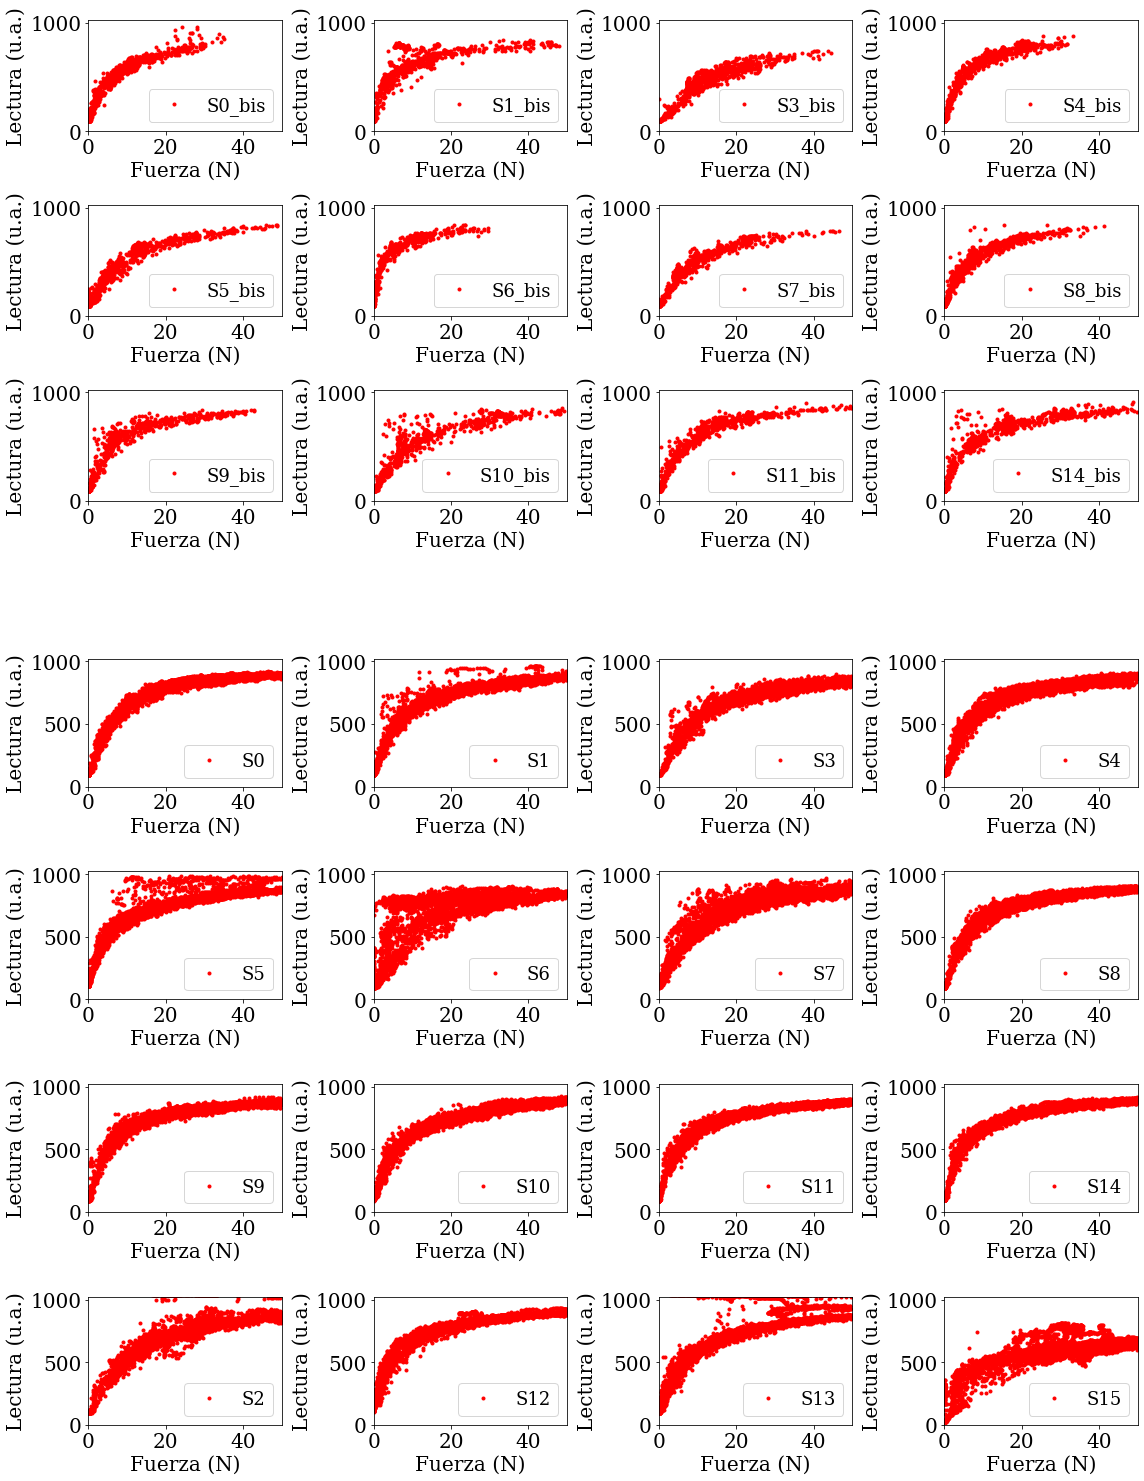

In [4]:
#Tiempo=[]
Fuerza_V = []
Voltaje_S = []
Lectura_S=[]
err_S = 0.143
ini = 0
fin = 5200
for i in range(len(databis)):
  F = fuerza(databis[i][:,1],pendbis,ordebis)
  V = databis[i][:,2]
  V_S, F_V =[], []
  for j in range(len(F)):
    
    if F[j] <= 50.:
      V_S.append(V[j])
      F_V.append(F[j])
  Voltaje_S.append(V_S)
  Lectura_S.append(np.round(np.array(V_S)*1023.0/5.0))
  Fuerza_V.append(F_V)

plt.figure(figsize=(16,20))
for i in range(12):
  plt.subplot(8,4,i+1)
  plt.plot(Fuerza_V[i], Lectura_S[i], 'r.', label='S'+str(sensdata[i])+'_bis')
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  plt.grid()
  plt.xlim(0,50)
  plt.ylim(0,1023)
  plt.legend()
  plt.tight_layout()
  plt.grid()
#plt.grid()

## Grafico el de la calibración común al lado para comparar
#Tiempo=[]
Fuerza_Vc = []
Voltaje_Sc = []
Lectura_Sc=[]
err_Sc = 0.143

for i in range(len(data)):
  Fc = fuerza(data[i][:,1],pend,orde)
  Vc = data[i][:,2]
  V_S, F_V =[], []
  for j in range(len(Fc)):
    
    if Fc[j] <= 50.:
      V_S.append(Vc[j])
      F_V.append(Fc[j])
  Voltaje_Sc.append(V_S)
  Lectura_Sc.append(np.round(np.array(V_S)*1023.0/5.0))
  Fuerza_Vc.append(F_V)

for i in range(16):
  plt.subplot(7,4,i+13)
  plt.plot(Fuerza_Vc[i], Lectura_Sc[i], 'r.', label='S'+str(sensdata[i]))
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  plt.grid()
  plt.xlim(0,50)
  plt.ylim(0,1023)
  plt.legend()
  plt.tight_layout()
  plt.grid()
#plt.grid()
#plt.savefig('comp_calibraciones.png')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


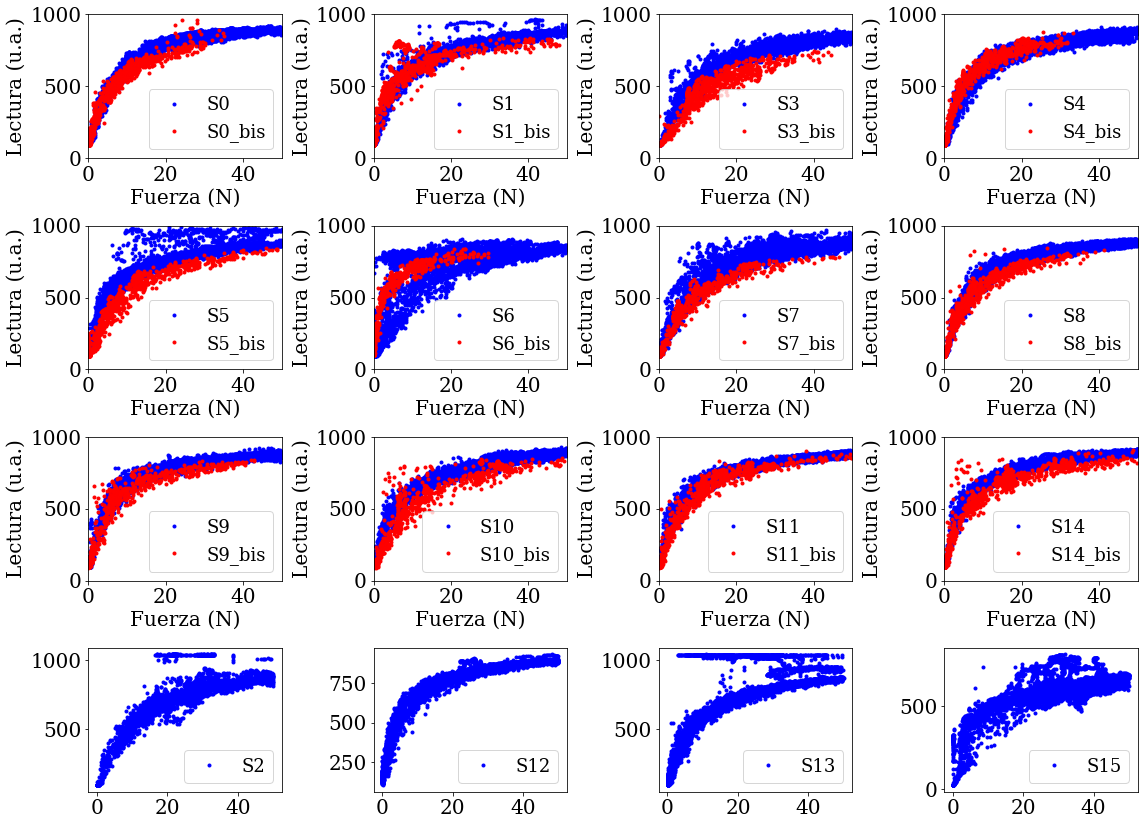

In [0]:
plt.figure(figsize=(16,20))
for i in range(16):
  plt.subplot(7,4,i+1)
  plt.plot(Fuerza_Vc[i], Lectura_Sc[i], 'b.', label='S'+str(sensdata[i]))
  plt.legend()
for i in range(12):
  plt.subplot(7,4,i+1)
  
  plt.plot(Fuerza_V[i], Lectura_S[i], 'r.', label='S'+str(sensdatabis[i])+'_bis')
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  plt.grid()
  plt.xlim(0,50)
  plt.ylim(0,1000)
  plt.legend()
  plt.tight_layout()
  plt.grid()
#plt.grid()
#plt.savefig('comp_calibraciones_juntos.png')
plt.show()

In [0]:
75*2.5

187.5

In [0]:
#Reordena por orden de Fuerza los datos ;)

def takeFirst(elem):
    return elem[0]

def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  #y = f*(1 - e**(-d*x))
  return y

def loga(x, d, e, f):
  y = 200+d + 180*e*np.log(x-f+1.5)
  #y = f*(1 - e**(-d*x))
  return y

def inversa(y, a, b, c):
  x = (-1/c)*np.log(1+(c/b)*(y-a))
  return x

def df_exp(x,params):
  b=params[1]
  c=params[2]
  df=np.zeros(4)
  df[0]=-b*np.exp(-c*x)
  df[1]=1
  df[2]=-(1-np.exp(-c*x))/c
  df[3]=b*np.exp(-c*x)*(np.exp(c*x)-c*x-1)/(c**2)
  return df

def prediccion_exp(x,error_x,params,cov_params):
    df=df_exp(x,params)
    Y=params[0]-params[1]*(1-np.exp(-params[2]*x))/params[2]
    sigma_Y=np.sqrt((df[0]*error_x)**2+(df[1]**2)*cov_params[0,0]
                    +((df[2]**2)*cov_params[1,1])+((df[3]**2)*cov_params[2,2])
                   +2*df[1]*df[2]*cov_params[0,1]+2*df[1]*df[3]*cov_params[0,2]
                    +2*df[2]*df[3]*cov_params[1,2])
    return(Y,sigma_Y)

def sliding_median(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))

        med = np.median([data_array[j] for j in indices])
        new_list.append(med)

    return new_list
  
def sliding_mean(data_array, window):
#    data_array = array(data_array)
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)

    return new_list

In [0]:
def lineal(x, a, b):
  y = a*x + b
  return y

parametros = []
covarianza = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(lineal, Fuerza_V[i],list(Lectura_S[i]), p0=[ 1, 5], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  a,b=popt[0], popt[1]
  parametros.append([a,b])
  covarianza.append(pcov)

i=0
print(parametros[i])
xp=np.linspace(0,50,1001)
#plt.plot(xp,lineal(xp,parametros[i][0],parametros[i][1]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = lineal(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = lineal(xp,parametros[i][0],parametros[i][1])-sigma_sensores[i]
  banda_u = lineal(xp,parametros[i][0],parametros[i][1])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,lineal(xp,parametros[i][0],parametros[i][1]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_lineal.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(lineal(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=2)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=2)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-2))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)

NameError: ignored

[-197.53346093820625, 1.33211844966353, 0.0641565727232117]


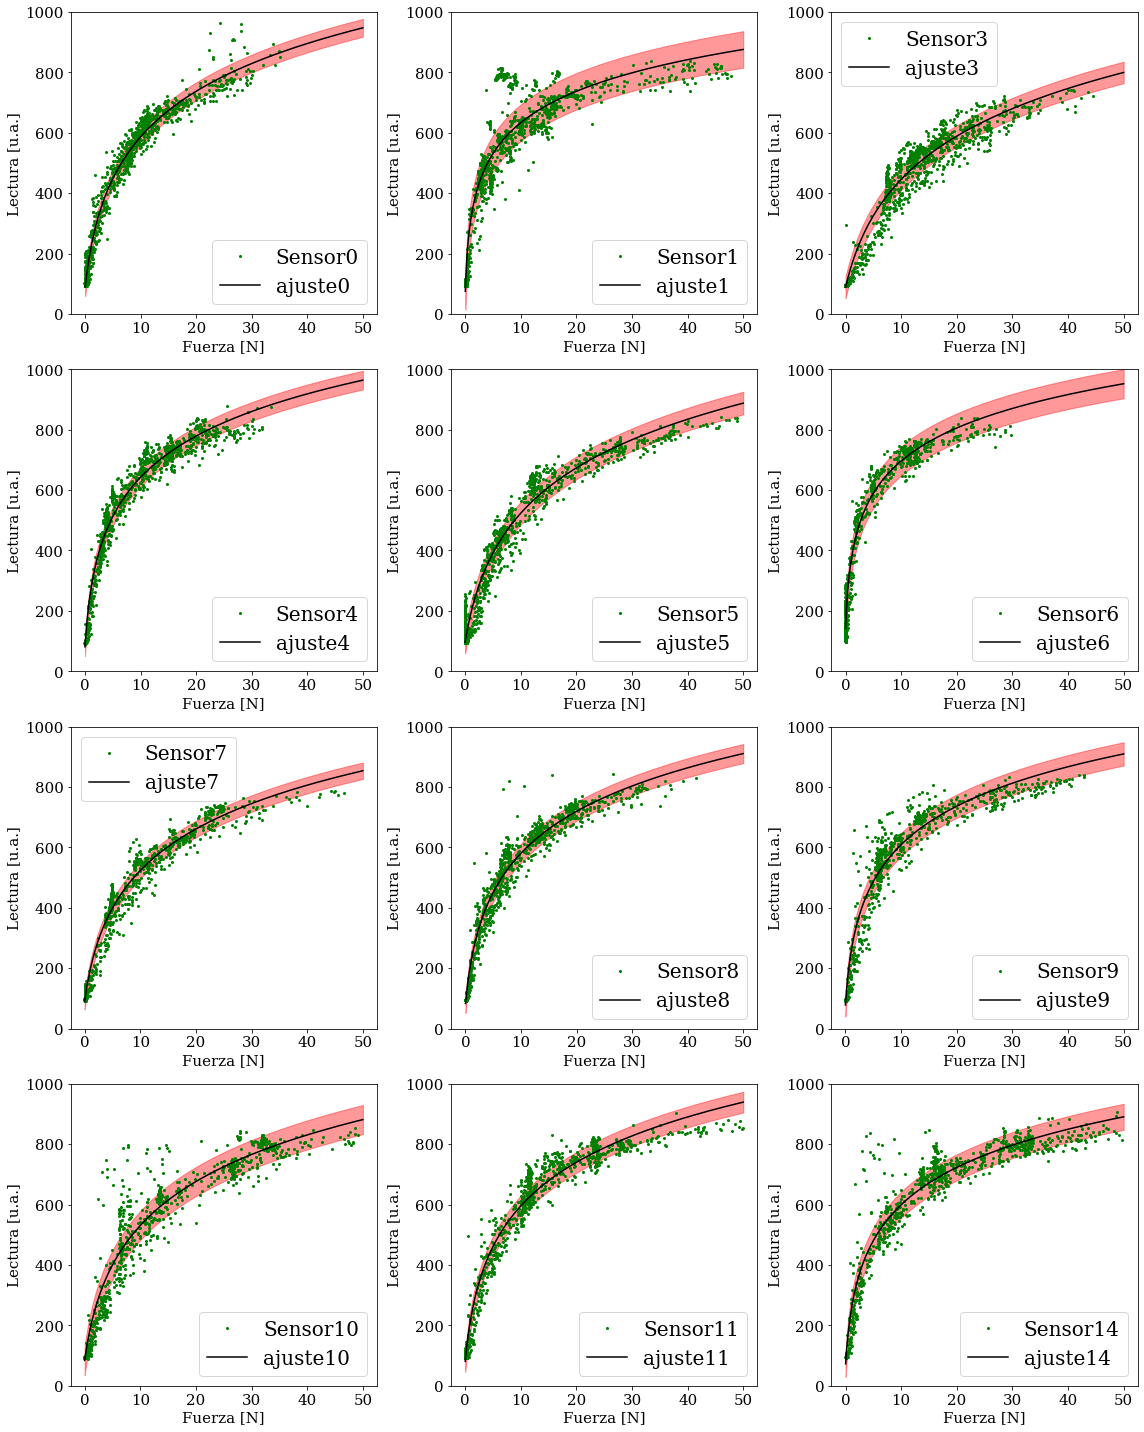

[0.0, 0.0, 0.0, 4.4259706091991276e-210, 0.0, 0.0, 1.2719672204616236e-153, 8.671491214892583e-247, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[-197.53346093820625, 1.33211844966353, 0.0641565727232117], [78.56231701708825, 0.8469072085365968, 1.2372170320576283], [-411.6590650888969, 1.4132332551700164, -1.744794541271738], [-47.54719248417899, 1.1479957758451773, 0.7931257167480763], [-305.3603536923224, 1.3946746204534222, -0.7311988822971813], [118.64916688983206, 0.8977671206620181, 1.166209260879641], [-221.42446010900082, 1.2322276525464884, -0.1547531919645663], [-139.40206969906046, 1.2000159762265885, 0.39083694667849794], [-48.899476185645824, 1.0729012017778754, 0.8150246552254157], [-253.7807941241735, 1.316433045932849, -0.2896776039797057], [-147.7069317579681, 1.2525045976189582, 0.3639319763109198], [-40.75024235353535, 1.0353719488769222, 0.8710074314465065]]
[array([[ 7.11058068e+01, -1.37727724e-01,  3.85405956e-01],
       [-1

In [6]:
"""
def expo(x, d, e, f):
  y = d - (e/f)*(1- np.exp(-f*x))
  #y = f*(1 - e**(-d*x))
  return y
"""
xp=np.linspace(0,50,1001)
def loga(x, d, e, f):
  y = 200+d + 180*e*np.log(x-f+1.5)
  #y = f*(1 - e**(-d*x))
  return y
parametros = []
covarianza = []
for i in range(12):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(loga, Fuerza_V[i],list(Lectura_S[i]),sigma=err_S*np.ones(len(Lectura_S[i])),p0=None)#,p0=[100, -75, 0.1])#, sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros.append([d,e,f])
  covarianza.append(pcov)

i=0
print(parametros[i])
#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs12 = []
err_aux = []

for m in range(12):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = loga(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs12.append(err_aux)
sigma_sensores=[]

for i in range(12):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs12[i])**2)/(len(errs12[i])-1)))

ms=4

plt.figure(figsize=(16,20))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(12): #]:#,]: importado
  banda_l = loga(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = loga(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(4,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms,label='Sensor'+str(sensdata[i]))
  plt.plot(xp,loga(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza [N]')
  plt.ylabel('Lectura [u.a.]')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,1000)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_expo.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(12):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(loga(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)


In [0]:
print(p_value)

print(p_v)

[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


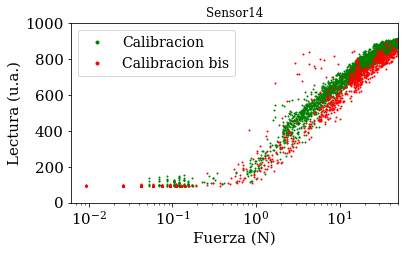

'\nchisq=[]\np_value=[]\np_v=[]\nfor i in range(3):\n  observed_values=scipy.array(np.array(Lectura_Sc[i]))\n  expected_values=scipy.array(expo(np.array(Fuerza_Vc[i]),parametros2[i][0],parametros2[i][1],parametros2[i][2]))\n\n  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])\n  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])\n  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))\n  \nprint(p_value)\n\nprint(p_v)\n\nprint(parametros2)\nprint(covarianza2)\n'

In [15]:
#Las dos juntas

parametros1 = []
covarianza1 = []
for i in range(12):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(loga, Fuerza_V[i],list(Lectura_S[i]), p0=None, sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros1.append([d,e,f])
  covarianza1.append(pcov)

parametros2 = []
covarianza2 = []
for i in range(16):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(loga, Fuerza_Vc[i],list(Lectura_Sc[i]), p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_Sc[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros2.append([d,e,f])
  covarianza2.append(pcov)
i=0
#print(parametros[i])
#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs121 = []
err_aux1 = []

for m in range(12):
  err_aux1 = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = loga(Fuerza_V[m][j] ,parametros1[m][0],parametros1[m][1],parametros1[m][2])
    err_aux1.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs121.append(err_aux1)
sigma_sensores1=[]

for i in range(12):
  sigma_sensores1.append(np.sqrt(np.sum(np.array(errs121[i])**2)/(len(errs121[i])-1)))

errs122 = []
err_aux2 = []

for m in range(16):
  err_aux2 = []
  for j in range(len(Fuerza_Vc[m])):
    
    y_pred = loga(Fuerza_Vc[m][j] ,parametros2[m][0],parametros2[m][1],parametros2[m][2])
    err_aux2.append(np.abs(Lectura_Sc[m][j] - y_pred))#**2)
  errs122.append(err_aux2)
sigma_sensores2 = []

for i in range(16):
  sigma_sensores2.append(np.sqrt(np.sum(np.array(errs122[i])**2)/(len(errs122[i])-1)))

ms=2

plt.figure(figsize=(16,12))
plt.rc('legend', fontsize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

for i in [11]:#range(12): #]:#,]:
  banda_l2 = loga(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2])-sigma_sensores2[i]
  banda_u2 = loga(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2])+sigma_sensores2[i]
  banda_l1 = loga(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2])-sigma_sensores1[i]
  banda_u1 = loga(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2])+sigma_sensores1[i]


  plt.subplot(4,3,i+1)

  plt.plot(Fuerza_Vc[i],Lectura_Sc[i], 'g.', markersize=ms,label='Calibracion')
  #plt.plot(xp,loga(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2]), 'b-', label='ajuste')
  plt.plot(Fuerza_V[i],Lectura_S[i], 'r.', markersize=ms, label='Calibracion bis')
  #plt.plot(xp,loga(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2]), 'k-', label='ajuste bis')
  #plt.fill_between(xp, banda_l1, banda_u1, color='y', alpha=0.4)
  #plt.fill_between(xp, banda_l2, banda_u2, color='c', alpha=0.4)
  plt.title('Sensor'+str(sensdata[i]))
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.xscale('log')
  #plt.yscale('log')
  plt.xlim(0,50)
  plt.ylim(0,1000)
  plt.legend(fontsize=14, markerscale=3.)

  
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_expo_comp.png')
plt.show()
"""
chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_Sc[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_Vc[i]),parametros2[i][0],parametros2[i][1],parametros2[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros2)
print(covarianza2)
"""

In [0]:
parametros1

[[-197.53346093820625, 1.33211844966353, 0.0641565727232117],
 [78.56231701708825, 0.8469072085365968, 1.2372170320576283],
 [-411.6590650888969, 1.4132332551700164, -1.744794541271738],
 [-47.54719248417899, 1.1479957758451773, 0.7931257167480763],
 [-305.3603536923224, 1.3946746204534222, -0.7311988822971813],
 [118.64916688983206, 0.8977671206620181, 1.166209260879641],
 [-221.42446010900082, 1.2322276525464884, -0.1547531919645663],
 [-139.40206969906046, 1.2000159762265885, 0.39083694667849794],
 [-48.899476185645824, 1.0729012017778754, 0.8150246552254157],
 [-253.7807941241735, 1.316433045932849, -0.2896776039797057],
 [-147.7069317579681, 1.2525045976189582, 0.3639319763109198],
 [-40.75024235353535, 1.0353719488769222, 0.8710074314465065]]

In [0]:
for i in range(12):
  print(np.round(sigma_sensores1[i],decimals=2))
for i in [12,13,14,15]:
  print(np.round(sigma_sensores2[i],decimals=2))

29.54
60.5
35.68
30.99
37.65
48.19
27.35
31.61
38.63
48.22
34.42
43.19
79.73
35.46
125.95
70.7


In [0]:
params=np.zeros((16,3))
vec=np.array([200,180,-1.5])
for i in range(12):
  params[i,0]=parametros1[i][0]+vec[0]
  params[i,1]=parametros1[i][1]*vec[1]
  params[i,2]=parametros1[i][2]+vec[2]
for i in [12,13,14,15]:
  params[i,0]=parametros2[i][0]+vec[0]
  params[i,1]=parametros2[i][1]*vec[1]
  params[i,2]=parametros2[i][2]+vec[2]

In [0]:
params
paramscirc=np.round(params,decimals=2)

In [0]:
np.set_printoptions(suppress=True)
paramscirc

array([[   2.47,  239.78,   -1.44],
       [ 278.56,  152.44,   -0.26],
       [-211.66,  254.38,   -3.24],
       [ 152.45,  206.64,   -0.71],
       [-105.36,  251.04,   -2.23],
       [ 318.65,  161.6 ,   -0.33],
       [ -21.42,  221.8 ,   -1.65],
       [  60.6 ,  216.  ,   -1.11],
       [ 151.1 ,  193.12,   -0.68],
       [ -53.78,  236.96,   -1.79],
       [  52.29,  225.45,   -1.14],
       [ 159.25,  186.37,   -0.63],
       [ -26.01,  240.57,   -1.41],
       [ 263.07,  170.3 ,   -0.39],
       [ 138.74,  211.16,   -0.68],
       [  96.18,  151.44,   -0.91]])

In [0]:
xp=np.linspace(0,50,1001)
def loga(x, d, e, f):
  y = 200+d + 180*e*np.log(x-f+1.5)
  #y = f*(1 - e**(-d*x))
  return y

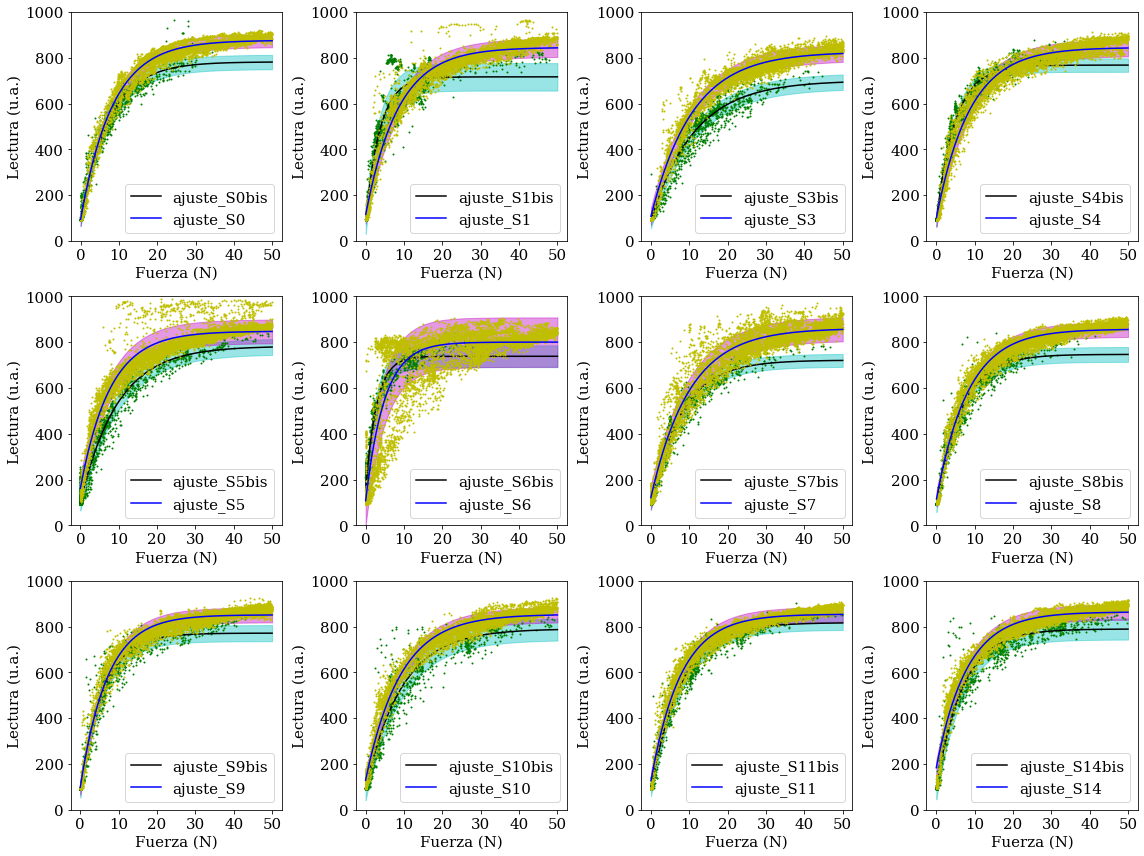

'\nchisq=[]\np_value=[]\np_v=[]\nfor i in range(3):\n  observed_values=scipy.array(np.array(Lectura_Sc[i]))\n  expected_values=scipy.array(expo(np.array(Fuerza_Vc[i]),parametros2[i][0],parametros2[i][1],parametros2[i][2]))\n\n  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])\n  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])\n  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))\n  \nprint(p_value)\n\nprint(p_v)\n\nprint(parametros2)\nprint(covarianza2)\n'

In [0]:
#Las dos juntas

parametros1 = []
covarianza1 = []
for i in range(12):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_V[i],list(Lectura_S[i]), p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros1.append([d,e,f])
  covarianza1.append(pcov)

parametros2 = []
covarianza2 = []
for i in range(12):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(expo, Fuerza_Vc[i],list(Lectura_Sc[i]), p0=[150, -100, 0.1], sigma=err_S*np.ones(len(Lectura_Sc[i])))#p0=[0, 0.3],
  d,e,f=popt[0], popt[1], popt[2]
  parametros2.append([d,e,f])
  covarianza2.append(pcov)
i=0
#print(parametros[i])
#plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs121 = []
err_aux1 = []

for m in range(12):
  err_aux1 = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = expo(Fuerza_V[m][j] ,parametros1[m][0],parametros1[m][1],parametros1[m][2])
    err_aux1.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs121.append(err_aux1)
sigma_sensores1=[]

for i in range(12):
  sigma_sensores1.append(np.sqrt(np.sum(np.array(errs121[i])**2)/(len(errs121[i])-1)))

errs122 = []
err_aux2 = []

for m in range(12):
  err_aux2 = []
  for j in range(len(Fuerza_Vc[m])):
    
    y_pred = expo(Fuerza_Vc[m][j] ,parametros2[m][0],parametros2[m][1],parametros2[m][2])
    err_aux2.append(np.abs(Lectura_Sc[m][j] - y_pred))#**2)
  errs122.append(err_aux2)
sigma_sensores2 = []

for i in range(12):
  sigma_sensores2.append(np.sqrt(np.sum(np.array(errs122[i])**2)/(len(errs122[i])-1)))

ms=2

plt.figure(figsize=(16,12))
plt.rc('legend', fontsize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(12): #]:#,]:
  banda_l1 = expo(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2])-sigma_sensores1[i]
  banda_u1 = expo(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2])+sigma_sensores1[i]
  banda_l2 = expo(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2])-sigma_sensores2[i]
  banda_u2 = expo(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2])+sigma_sensores2[i]

  plt.subplot(3,4,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,expo(xp,parametros1[i][0],parametros1[i][1],parametros1[i][2]), 'k-', label='ajuste_S'+str(sensdata[i])+'bis')
  plt.plot(Fuerza_Vc[i],Lectura_Sc[i], 'y.', markersize=ms)
  plt.plot(xp,expo(xp,parametros2[i][0],parametros2[i][1],parametros2[i][2]), 'b-', label='ajuste_S'+str(sensdata[i]))
  plt.fill_between(xp, banda_l1, banda_u1, color='c', alpha=0.4)
  plt.fill_between(xp, banda_l2, banda_u2, color='m', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,1000)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_expo_comp.png')
plt.show()
"""
chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_Sc[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_Vc[i]),parametros2[i][0],parametros2[i][1],parametros2[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros2)
print(covarianza2)
"""

In [0]:
parametros2,sigma_sensores2


([[-27.111919978482188, 1.093938666726875, 0.9851833361780927],
  [-26.14975497162026, 1.0464362671302818, 1.0216608649519114],
  [-159.75078410565752, 1.172955300232584, 0.46452888033330125],
  [-69.23769479544625, 1.0985161998137527, 0.8713225079566124],
  [53.0604270986158, 0.9255840561408775, 1.1326741185994567],
  [107.49547163759657, 0.8086536193583748, 1.3479244155000745],
  [-130.54384266187262, 1.1883147776461171, 0.48413613403128336],
  [2.628498669557013, 1.0138066181122456, 1.1282303462725736],
  [69.20880499430366, 0.9056301392559876, 1.3016080536602286],
  [-33.53366286686029, 1.043132556588752, 0.8989234198130285],
  [43.9289663634351, 0.949842995811725, 1.2117315431974094],
  [73.31887941165964, 0.9148464189587207, 1.2874445851947378]],
 [38.821278466347074,
  38.71579704870181,
  39.275052851152466,
  38.61105819145743,
  49.70442694212622,
  110.54970878906946,
  56.107786398555845,
  34.917620095641105,
  35.99208024273564,
  29.502118667380707,
  29.59304692668921,


In [0]:
sigma_sensores2

[28.512777902715097,
 40.010420720427646,
 37.057148389443526,
 37.00773130508594,
 51.91110484983239,
 107.92706676390736,
 52.21984128672663,
 32.48796184477036,
 32.4467264137054,
 33.002660299808475,
 32.11151344713409,
 33.01320422654393]

[-0.473620721382911, 30.13372103784265, 83.75253636664664]


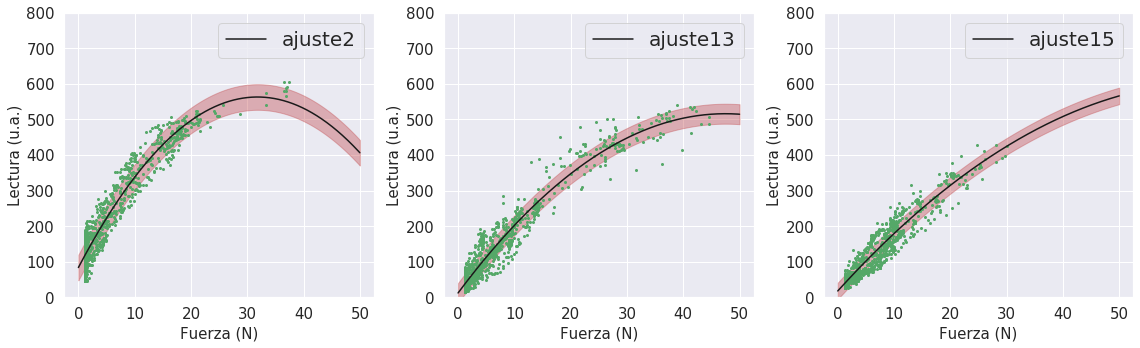

[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[[-0.473620721382911, 30.13372103784265, 83.75253636664664], [-0.22346546272882914, 21.222223969682943, 12.227222581293974], [-0.12920132235219922, 17.426226054207145, 17.869760901624723]]
[array([[ 2.83682080e-04, -6.31460416e-03,  1.28112783e-02],
       [-6.31460416e-03,  1.65377882e-01, -3.96991775e-01],
       [ 1.28112783e-02, -3.96991775e-01,  1.94680148e+00]]), array([[ 6.43862160e-05, -1.98406908e-03,  5.58540656e-03],
       [-1.98406908e-03,  6.93157997e-02, -2.22147152e-01],
       [ 5.58540656e-03, -2.22147152e-01,  1.31697661e+00]]), array([[ 2.25307681e-04, -4.31227176e-03,  1.10065567e-02],
       [-4.31227176e-03,  9.58624180e-02, -2.85510046e-01],
       [ 1.10065567e-02, -2.85510046e-01,  1.31920069e+00]])]


In [0]:
def cuadratica(x, a, b, c):
  y = a*x**2 + b*x + c
  #y = f*(1 - e**(-d*x))
  return y

parametros = []
covarianza = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(cuadratica, Fuerza_V[i],list(Lectura_S[i]), p0=[-0.5,40,80], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  a,b,c=popt[0], popt[1], popt[2]
  parametros.append([a,b,c])
  covarianza.append(pcov)

i=0
print(parametros[i])
#plt.plot(xp,cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = cuadratica(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_cuadratica.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(cuadratica(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)

[-0.0007947322084884891, 1.349277763160262, 137.57708352158616]


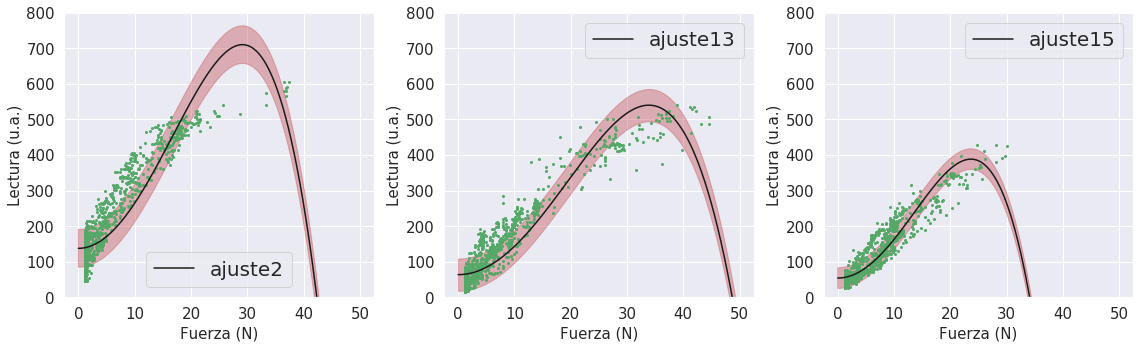

[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]
[[-0.0007947322084884891, 1.349277763160262, 137.57708352158616], [-0.00036066717753162835, 0.8290345980260592, 63.66256331052224], [-0.0010679635650014268, 1.1950614603909346, 54.0699471268869]]
[array([[ 3.65207635e-10, -3.08948530e-07,  8.50684955e-06],
       [-3.08948530e-07,  3.53542517e-04, -1.22786430e-02],
       [ 8.50684955e-06, -1.22786430e-02,  2.35017592e+00]]), array([[ 8.32530623e-11, -1.02729639e-07,  3.82690299e-06],
       [-1.02729639e-07,  1.46604674e-04, -6.74231277e-03],
       [ 3.82690299e-06, -6.74231277e-03,  1.75655621e+00]]), array([[ 7.61740399e-10, -3.85420995e-07,  1.11988856e-05],
       [-3.85420995e-07,  2.43807833e-04, -8.52758309e-03],
       [ 1.11988856e-05, -8.52758309e-03,  8.94988031e-01]])]


In [0]:
def cuartica(x, a, b, c):
  y = a*x**4 + b*x**2 + c
  #y = f*(1 - e**(-d*x))
  return y

parametros = []
covarianza = []
for i in range(3):
  #err=np.ones(len(Voltaje_ordenado[i]))*err_Voltaje
  popt, pcov = curve_fit(cuartica, Fuerza_V[i],list(Lectura_S[i]), p0=[-1,40,50], sigma=err_S*np.ones(len(Lectura_S[i])))#p0=[0, 0.3],
  a,b,c=popt[0], popt[1], popt[2]
  parametros.append([a,b,c])
  covarianza.append(pcov)

i=0
print(parametros[i])
#plt.plot(xp,cuadratica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))

errs3 = []
err_aux = []

for m in range(3):
  err_aux = []
  for j in range(len(Fuerza_V[m])):
    
    y_pred = cuartica(Fuerza_V[m][j] ,parametros[m][0],parametros[m][1],parametros[m][2])
    err_aux.append(np.abs(Lectura_S[m][j] - y_pred))#**2)
  errs3.append(err_aux)
sigma_sensores=[]

for i in range(3):
  sigma_sensores.append(np.sqrt(np.sum(np.array(errs3[i])**2)/(len(errs3[i])-1)))

ms=4

plt.figure(figsize=(16,5))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = cuartica(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = cuartica(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,cuartica(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()
#plt.savefig('ajuste_cuadratica.png')
plt.show()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(cuartica(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

print(parametros)
print(covarianza)

In [0]:
print(Fuerza_V[m][j])

1.6275663380000012


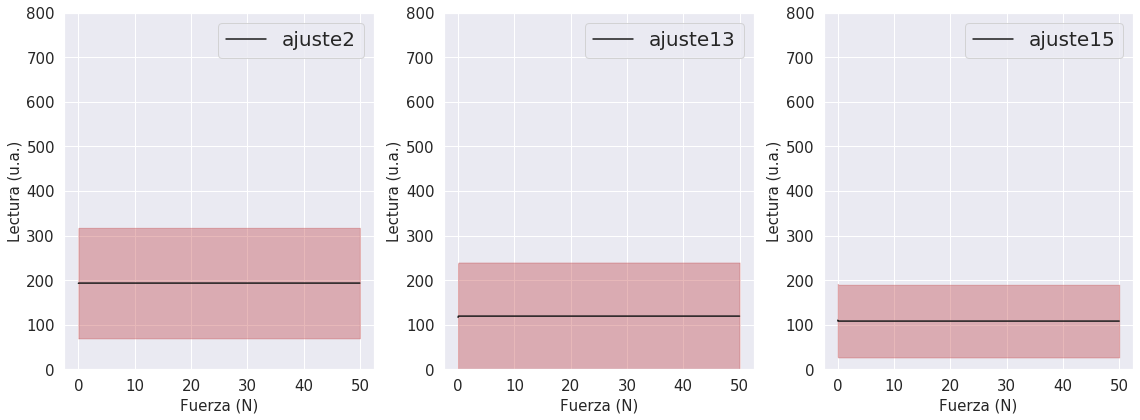

In [0]:
ms=2
xp=np.linspace(0,50,1001)

plt.figure(figsize=(16,6))
plt.rc('legend', fontsize=20)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for i in range(3): #]:#,]:
  banda_l = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i]
  banda_u = expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i]
  plt.subplot(1,3,i+1)
  #plt.plot(Fuerza_V[i],Lectura_S[i], 'g.', markersize=ms)
  plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', label='ajuste'+str(sensdata[i]))
  plt.fill_between(xp, banda_l, banda_u, color='r', alpha=0.4)
  plt.legend()
  #plt.rc('legend', fontsize=25)
  plt.grid()
#  plt.plot(xp,banda_u[i],'g-', alpha=0.8)
#  plt.plot(xp,banda_l[i],'g-', alpha=0.8)
 # plt.fill_between(xp, banda_l[i], banda_u[i], color='g', alpha=0.4)
  plt.xticks([0,10,20,30,40, 50])
  plt.xlabel('Fuerza (N)')
  plt.ylabel('Lectura (u.a.)')
  #plt.rc('axes', labelsize=35)
  #plt.rc('xtick', labelsize=35)
  #plt.rc('ytick', labelsize=35)
  plt.ylim(0,800)
  plt.grid()
  plt.tight_layout()

chisq=[]
p_value=[]
p_v=[]
for i in range(3):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)

In [0]:
err_porc = []
for j in range(16):
  err_porc.append(round(100*sigma_sensores[j]/min(Lectura_S[j]),0))
  
err_porc[5] = round(100*sigma_sensores[5]/min(Vs_s5),0)
err_porc[6] = round(100*sigma_sensores[6]/min(Vs_s5),0)

print(err_porc)

In [0]:
i = 0
print(sigma_sensores[i])
err_porc = int(100*sigma_sensores[i]/min(Lectura_S[i]))
plt.figure(figsize=(15,10))
plt.rc('legend', fontsize=30)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
#plt.errorbar(Fuerza_V[i], Lectura_S[i],yerr=sigma_sensores[i], fmt='bo', ecolor='y', markersize=4, label='Sensor '+str(i)+':' +r'$\ \sigma_{\%} \ \leq$'+str(err_porc))
plt.plot(Fuerza_V[i], Lectura_S[i], 'b.', markersize=5, label='Sensor '+str(i)+':' +r'$\ \sigma_{\%} \ \leq$'+str(err_porc))
#plt.plot(Fv_s5, Vs_s5, 'g.', label=r'$\sigma_{\%} \ \leq$'+str(err_porc))
plt.fill_between(xp, expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])-sigma_sensores[i], expo(xp,parametros[i][0],parametros[i][1],parametros[i][2])+sigma_sensores[i], color='r', alpha=0.4, label='Intervalo de confianza')
plt.grid()

plt.plot(xp,expo(xp,parametros[i][0],parametros[i][1],parametros[i][2]), 'k-', linewidth=3, label='Ajuste')
plt.legend(loc='lower right')
plt.xticks([0,10,20,30,40, 50])
#plt.yticks([1,2,3,4,5])
plt.xlabel('Fuerza (N)')
plt.ylabel('Lectura (u.a.)')
plt.xlim(0,50)
plt.ylim(0,1023)
plt.grid()
plt.tight_layout()
#plt.savefig('calib_crudo_s'+str(i)+'.png')
#plt.savefig('calib_s'+str(i)+'.png')
plt.show()

In [0]:
import scipy

In [0]:
chisq=[]
p_value=[]
p_v=[]
for i in range(16):
  observed_values=scipy.array(np.array(Lectura_S[i]))
  expected_values=scipy.array(expo(np.array(Fuerza_V[i]),parametros[i][0],parametros[i][1],parametros[i][2]))

  chisq.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[0])
  p_value.append(scipy.stats.chisquare(observed_values, f_exp=expected_values,ddof=3)[1])
  p_v.append(1-scipy.stats.chi2.cdf(chisq[-1],len(observed_values)-3))
  
print(p_value)

print(p_v)